In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as pl
from collections import defaultdict
from pprint import pprint
import itertools
import random

pl.rcParams['figure.figsize'] = [12, 12]

In [5]:
g = nx.read_graphml('mention.graphml')
if g.is_directed():
    g = g.to_undirected()
# convert from multigraph to standard graph
g = nx.Graph(g)
nodes = g.nodes(data=True)
edges = g.edges()
info = nx.info(g)
print(info)
nodes = {k: v for k, v in nodes}
edges = tuple((k, v) for k, v in edges)
fname = 'cluster'
fcon = 'right'
flib = 'left'
fcen = '-'
con = [k for k, v in nodes.items() if v[fname] == fcon]
lib = [k for k, v in nodes.items() if v[fname] == flib]
cen = [k for k, v in nodes.items() if v[fname] == fcen]
pprint(dict(con=len(con), lib=len(lib), cen=len(cen), total=(len(con) + len(lib) + len(cen))))

Name: 
Type: Graph
Number of nodes: 7175
Number of edges: 11681
Average degree:   3.2560
{'cen': 3271, 'con': 2101, 'lib': 1803, 'total': 7175}


In [6]:
# calc modularity of network
from networkx.algorithms.community.quality import modularity
q =  modularity(g, [con, lib, cen])

pprint(dict(modularity=q))

{'modularity': 0.10937366167058862}


In [9]:
esample = random.sample(edges, 25)
print("Edge Sample:")
pprint(esample)

nsample = {'left': {}, 'right': {}, '-': {}}
for u, v in esample:
    uclust = g.nodes[u]['cluster']
    vclust = g.nodes[v]['cluster']
    if u not in nsample[uclust]:
        nsample[uclust][u] = tuple(g.neighbors(u))
    if v not in nsample[vclust]:
        nsample[vclust][v] = tuple(g.neighbors(v))

print("Nodes from Edges Sample:")
pprint(nsample, depth=2)

Edge Sample:
[('n2677', 'n4345'),
 ('n5785', 'n6827'),
 ('n1111', 'n1960'),
 ('n714', 'n1145'),
 ('n3471', 'n5937'),
 ('n1704', 'n4648'),
 ('n2201', 'n4477'),
 ('n1199', 'n3913'),
 ('n3534', 'n4082'),
 ('n4023', 'n4900'),
 ('n234', 'n3704'),
 ('n5018', 'n5783'),
 ('n714', 'n5921'),
 ('n92', 'n3198'),
 ('n551', 'n568'),
 ('n1218', 'n6259'),
 ('n1882', 'n4193'),
 ('n802', 'n6447'),
 ('n1060', 'n3152'),
 ('n3219', 'n6667'),
 ('n2460', 'n4240'),
 ('n4570', 'n5978'),
 ('n3720', 'n6278'),
 ('n1882', 'n4814'),
 ('n1267', 'n3164')]
Nodes from Edges Sample:
{'-': {'n234': (...,),
       'n2677': (...,),
       'n3152': (...),
       'n3219': (...,),
       'n4193': (...,),
       'n4814': (...),
       'n5937': (...),
       'n6278': (...)},
 'left': {'n1060': (...),
          'n3164': (...),
          'n3534': (...,),
          'n3704': (...),
          'n3913': (...),
          'n4082': (...),
          'n4240': (...),
          'n4345': (...),
          'n4477': (...),
          'n4648': (..

In [13]:
def ratio_calc(graph, node, sweight=1, oweight=0, nweight=0.5, 
               field='cluster', neutral='-', right='right', left='left', 
               no_alignment_value=None):
    """
    Perform a ratio calculation on given node in graph.
    """
    nbors = tuple(graph.neighbors(node))
    nclust = graph.nodes[node][field]
    
    if nclust == neutral:
        return no_alignment_value
    
    counts = { k: float(len(list(v))) for k,v in itertools.groupby(nbors, key=lambda y: graph.nodes[y][field]) }
    nother = right if nclust == left else left
    ratio = ((sweight * counts.get(nclust, 0)) + (oweight * counts.get(nother, 0)) + (nweight * counts.get(neutral, 0))) \
                / len(nbors)
    return ratio

ratios = { n: ratio_calc(g, n) for n in g.nodes() }
ratios = { k: v for k, v in ratios.items() if v }
#pprint(ratios)

n3189 1


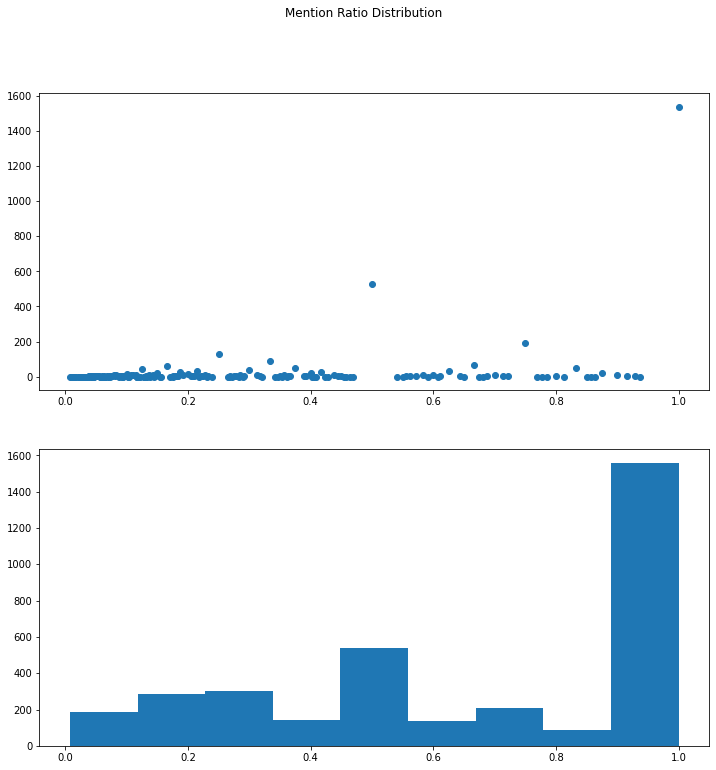

In [11]:
d = { k: len(tuple(v)) for k, v in itertools.groupby(sorted(ratios.values())) }
plot, (ap, bp) = pl.subplots(2)
plot.suptitle('Mention Ratio Distribution')
ap.scatter(d.keys(), d.values())
bp.hist(ratios.values(), bins=9)
plot.show()